Classification Report:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       0.0
           0       0.00      0.00      0.00      75.0
           1       0.00      0.00      0.00      75.0
           2       0.00      0.00      0.00      75.0
           3       0.00      0.00      0.00      75.0
           4       0.00      0.00      0.00       0.0

    accuracy                           0.00     300.0
   macro avg       0.00      0.00      0.00     300.0
weighted avg       0.00      0.00      0.00     300.0

Silhouette Score: 0.3247770651894683


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


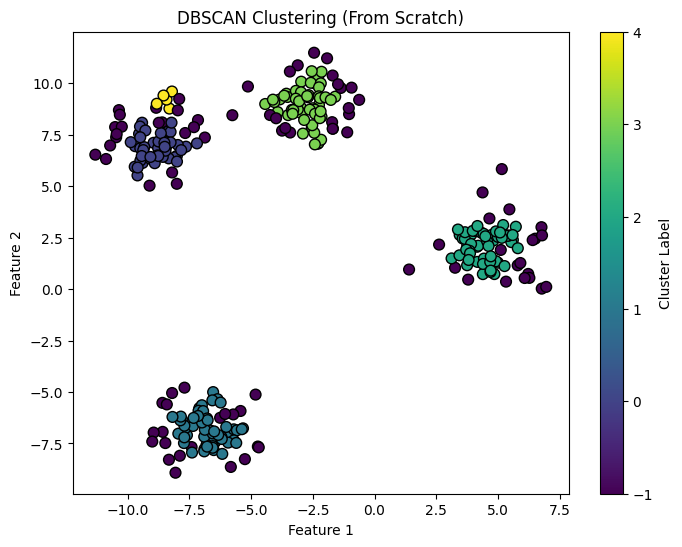

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import classification_report, silhouette_score

# Function to calculate Euclidean distance
def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

# Function to find neighbors within eps distance
def region_query(X, point_idx, eps):
    neighbors = []
    for i, point in enumerate(X):
        if euclidean_distance(X[point_idx], point) <= eps:
            neighbors.append(i)
    return neighbors

# DBSCAN algorithm implementation
def dbscan(X, eps, min_samples):
    n_samples = len(X)
    labels = np.full(n_samples, -1)  # -1 means unclassified
    cluster_id = 0
    visited = np.zeros(n_samples, dtype=bool)

    def expand_cluster(point_idx, neighbors, cluster_id):
        labels[point_idx] = cluster_id
        i = 0
        while i < len(neighbors):
            neighbor_idx = neighbors[i]
            if not visited[neighbor_idx]:
                visited[neighbor_idx] = True
                new_neighbors = region_query(X, neighbor_idx, eps)
                if len(new_neighbors) >= min_samples:
                    neighbors += new_neighbors  # Merge neighbors into current list
            if labels[neighbor_idx] == -1:
                labels[neighbor_idx] = cluster_id
            i += 1

    for point_idx in range(n_samples):
        if visited[point_idx]:
            continue
        visited[point_idx] = True
        neighbors = region_query(X, point_idx, eps)
        if len(neighbors) < min_samples:
            labels[point_idx] = -1  # Mark as noise
        else:
            expand_cluster(point_idx, neighbors, cluster_id)
            cluster_id += 1
    return labels

# Generate a sample dataset
X, y = make_blobs(n_samples=300, centers=4, random_state=42)

# DBSCAN hyperparameters
eps = 0.5
min_samples = 5

# Apply DBSCAN from scratch
dbscan_labels = dbscan(X, eps, min_samples)

# Print the classification report (comparing with ground truth labels)
print("Classification Report:")
print(classification_report(y, dbscan_labels))

# Calculate silhouette score
sil_score = silhouette_score(X, dbscan_labels)
print("Silhouette Score:", sil_score)

# Plot the clustering result
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis', marker='o', edgecolor='k', s=60)
plt.title("DBSCAN Clustering (From Scratch)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label='Cluster Label')
plt.show()
